In [1]:
from datetime import datetime
import pandas as pd
import requests, time

In [2]:
def datetotimestamp(date):
    time_tuple = date.timetuple()
    timestamp = round(time.mktime(time_tuple))
    return timestamp

In [3]:
def timestamptodate(timestamp):
    return datetime.fromtimestamp(timestamp)

In [4]:
start = datetotimestamp(datetime(2022,4,7))
end = datetotimestamp(datetime.today())
symbol = 'ONGC'
resolution = "1" # 1 min = 1, 3 min = 3, 5 min = 5, 1 hour = 60, 1 day = 1D
url = f"https://priceapi.moneycontrol.com/techCharts/techChartController/history?symbol={symbol}&resolution={resolution}&from={str(start)}&to={str(end)}"



req = requests.get(url).json()
data = pd.DataFrame(req)
date = []
for dt in data['t']:
    date.append({'Date':timestamptodate(dt)})
dt = pd.DataFrame(date)
intraday_data = pd.concat([dt,data['o'],data['h'],data['l'],data['c'],data['v']],axis = 1).rename(columns = {'o':'Open', 'h':"High", 'l':"Low", 'c':'Close','v':"Volume"})
intraday_data.to_csv(f"C:/Users/prvij/Desktop/{symbol}.csv",header=True,index = False)

# Graph for single day


In [5]:
import matplotlib.pyplot as plt

In [6]:
intraday_data.head()

,Date,Open,High,Low,Close,Volume
0,2022-04-07 09:15:00,171.40,171.40,170.4,170.70,649955
1,2022-04-07 09:16:00,171.10,171.10,170.2,170.20,929742
2,2022-04-07 09:17:00,170.30,170.35,169.9,169.90,1128009
3,2022-04-07 09:18:00,169.85,169.85,169.4,169.80,1649000
4,2022-04-07 09:19:00,169.70,169.95,169.6,169.95,1867851


In [7]:
f = []
for k in intraday_data['Date']:
    h = ".".join(str(k)[-8:-3].split(':'))
    f.append({'Time':float(h)})
o = pd.DataFrame(f)

In [8]:
a = pd.concat([o,intraday_data['Open'],intraday_data['High'],intraday_data['Low'],intraday_data['Close'],intraday_data['Volume']],axis = 1)

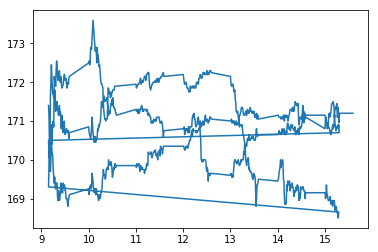

In [9]:
plt.plot(o['Time'],intraday_data['Open'])

# Graph for days

In [10]:
intraday_data.head()

,Date,Open,High,Low,Close,Volume
0,2022-04-07 09:15:00,171.40,171.40,170.4,170.70,649955
1,2022-04-07 09:16:00,171.10,171.10,170.2,170.20,929742
2,2022-04-07 09:17:00,170.30,170.35,169.9,169.90,1128009
3,2022-04-07 09:18:00,169.85,169.85,169.4,169.80,1649000
4,2022-04-07 09:19:00,169.70,169.95,169.6,169.95,1867851


In [11]:
f = []
for k in intraday_data['Date']:
    h = str(k)[8:10]
    f.append({'Day':h})
o = pd.DataFrame(f)

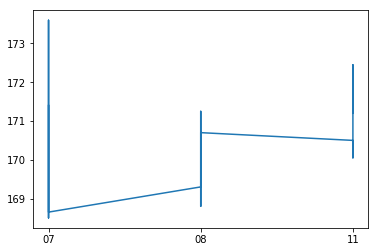

In [12]:
plt.plot(o['Day'],intraday_data['Open'])

In [13]:
intraday_data.head()

,Date,Open,High,Low,Close,Volume
0,2022-04-07 09:15:00,171.40,171.40,170.4,170.70,649955
1,2022-04-07 09:16:00,171.10,171.10,170.2,170.20,929742
2,2022-04-07 09:17:00,170.30,170.35,169.9,169.90,1128009
3,2022-04-07 09:18:00,169.85,169.85,169.4,169.80,1649000
4,2022-04-07 09:19:00,169.70,169.95,169.6,169.95,1867851


In [14]:
f = []
for k in intraday_data['Date']:
    h = ".".join(str(k)[5:10].split('-'))
    f.append({'Month':h})
o = pd.DataFrame(f)

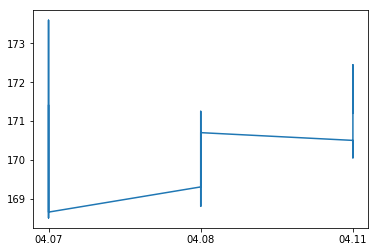

In [15]:
plt.plot(o['Month'],intraday_data['Open'])